This notebook contains the EDA of the the phase 3 project.

Rating Scale
 
4.0 - 5.0   = Outstanding </br>
3.5 - 3.9   = Highly Recommended </br>
3.0 - 3.49 = Recommended </br>
2.0 - 2.9   = Disappointing </br>
1.0 - 1.9   = Unpleasant </br>

In [50]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from collections import Counter
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
!pip install wordcloud

Import the dataframe

In [2]:
df = pd.read_csv("data/chocolate.csv")

In [3]:
df

,REF,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


In [4]:
df.shape

(2362, 10)

# Data Statistics

Look at the datatypes of our columns. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2362 entries, 0 to 2361
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2362 non-null   int64  
 1   Company (Manufacturer)            2362 non-null   object 
 2   Company Location                  2362 non-null   object 
 3   Review Date                       2362 non-null   int64  
 4   Country of Bean Origin            2362 non-null   object 
 5   Specific Bean Origin or Bar Name  2362 non-null   object 
 6   Cocoa Percent                     2362 non-null   object 
 7   Ingredients                       2274 non-null   object 
 8   Most Memorable Characteristics    2362 non-null   object 
 9   Rating                            2362 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 184.7+ KB


Calculating some statistical data of the dataframe

In [6]:
df.describe()

,REF,Review Date,Rating
count,2362.000000,2362.000000,2362.000000
mean,1343.279848,2013.894581,3.187384
std,709.468334,3.667615,0.450292
min,5.000000,2006.000000,1.000000
25%,754.000000,2011.000000,3.000000
50%,1377.000000,2014.000000,3.250000
75%,1948.000000,2017.000000,3.500000
max,2542.000000,2021.000000,4.000000


See the correlations of the target and the numerical features

In [7]:
df.corr()

,REF,Review Date,Rating
REF,1.000000,0.992096,0.092580
Review Date,0.992096,1.000000,0.095099
Rating,0.092580,0.095099,1.000000


In [8]:
g = df.corr()

Create a heatmap of the correlations.

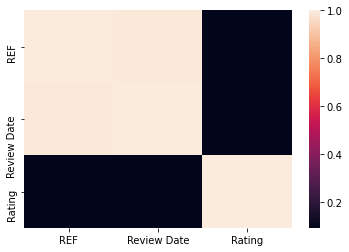

In [9]:
ax = sns.heatmap(g)

Checking to see what the null values are.

In [10]:
df.isna().sum()

REF                                  0
Company (Manufacturer)               0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         88
Most Memorable Characteristics       0
Rating                               0
dtype: int64

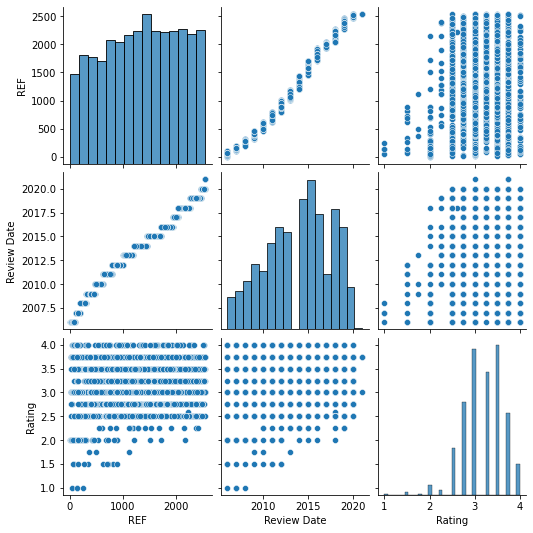

In [11]:
sns.pairplot(df)

Make the columns lowercased and remove the spaces and replace them with upper case. 

In [12]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')

In [13]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63%,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70%,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80%,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75%,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72%,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70%,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


Calculating some statistical data of rating.

In [14]:
df['rating'].describe()


count    2362.000000
mean        3.187384
std         0.450292
min         1.000000
25%         3.000000
50%         3.250000
75%         3.500000
max         4.000000
Name: rating, dtype: float64

Look at the number of values in rating.

In [15]:
df.rating.value_counts().sort_index(ascending=False)

4.00    104
3.75    280
3.50    512
3.25    421
3.00    498
2.75    319
2.60      1
2.50    160
2.25     17
2.00     33
1.75      3
1.50     10
1.00      4
Name: rating, dtype: int64

Make a countplot of rating to visualize the counts.

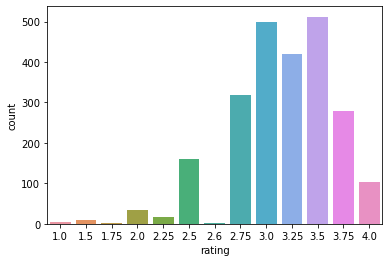

In [16]:
p = sns.countplot(data=df, x = 'rating')

Barplot to see what the ranges are for Cocoa percent

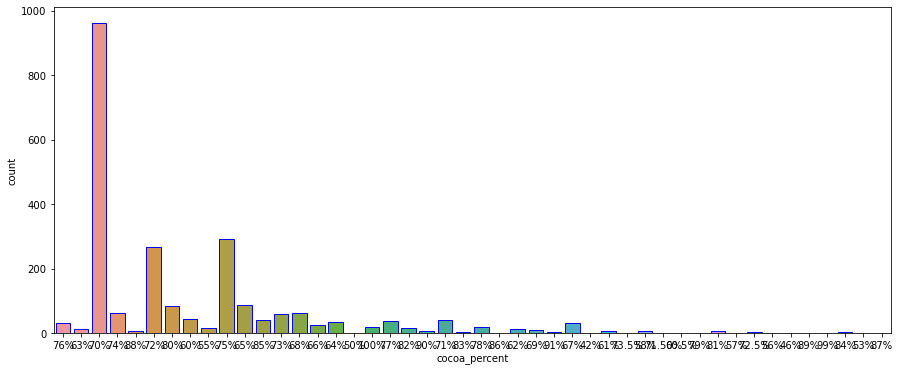

In [17]:
plt.figure(figsize=(15,6))
p = sns.countplot(data=df, x = 'cocoa_percent', edgecolor='blue')

Change the cocoa percentage to a float

In [18]:
df['cocoa_percent']= df['cocoa_percent'].str.replace('%','').astype(float)
df.head()

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50


Bean origin country and rating

Text(0.5, 1.0, 'Boxplot, Rating for countries')

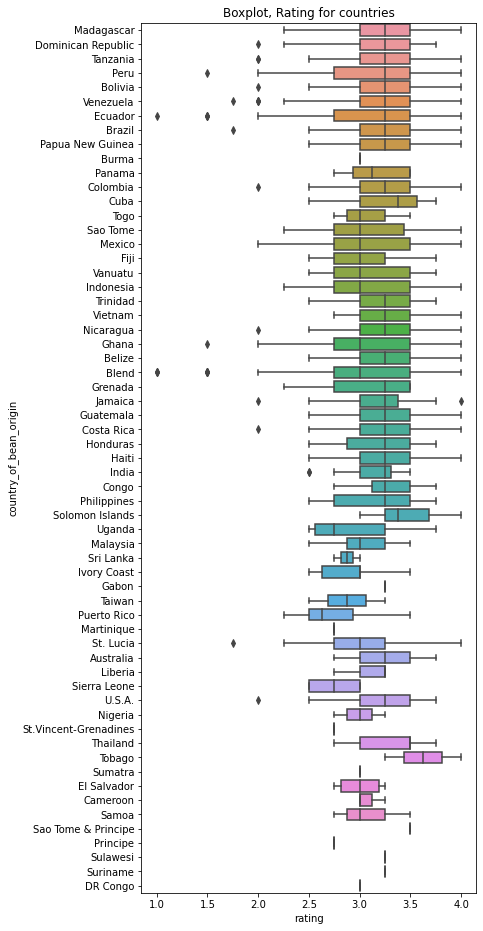

In [19]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(data=df,y='country_of_bean_origin',x='rating')
ax.set_title('Boxplot, Rating for countries')

Make a box plot of company location and rating

Text(0.5, 1.0, 'Boxplot, Rating by Company location')

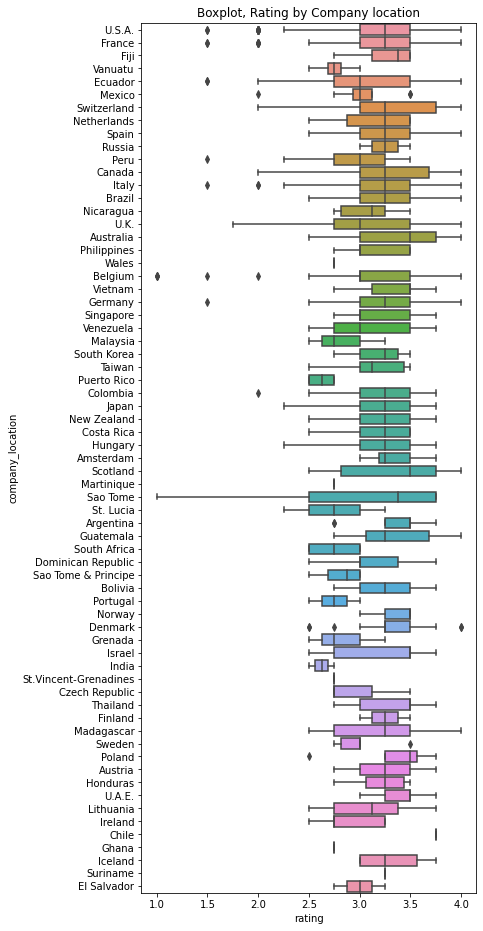

In [20]:
fig, ax = plt.subplots(figsize=[6, 16])
sns.boxplot(data=df,y='company_location',x='rating')
ax.set_title('Boxplot, Rating by Company location')

Text(0.5, 1.0, 'Boxplot, Rating by Company location')

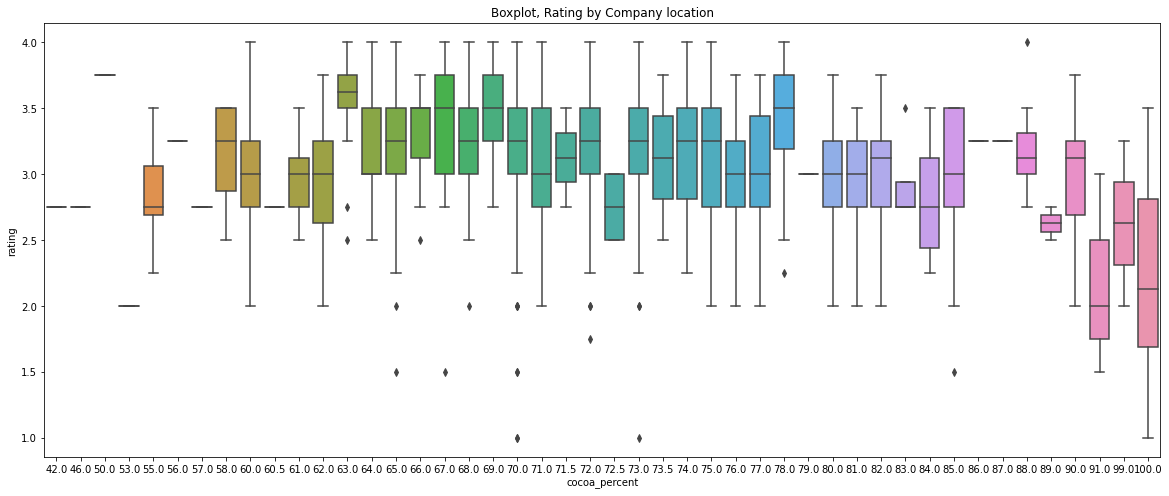

In [21]:
fig, ax = plt.subplots(figsize=[20, 8])
sns.boxplot(data=df,y='rating',x='cocoa_percent')
ax.set_title('Boxplot, Rating by Company location')

Calculating the average mean of company manufacturer and rating.

In [22]:
cm=df.groupby(['company_(manufacturer)']).mean().sort_values(by='rating', ascending=False)['rating'].to_dict()


Count of times this show up on the overall data

In [23]:
cmcount = df['company_(manufacturer)'].value_counts(normalize=True).to_dict() 
#count of times this show up on the overall data


Plot the weighted rating. Multipy average count by rating.

Text(0, 0.5, 'Weighted Rating')

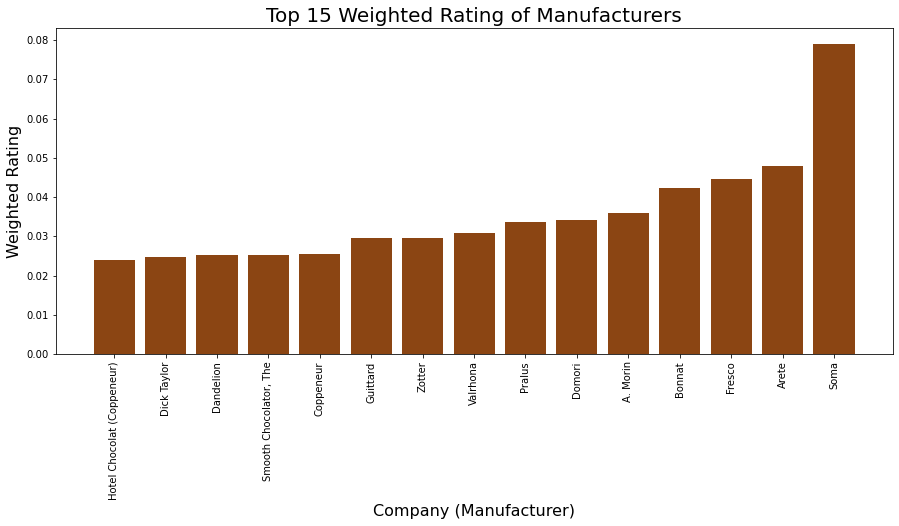

In [24]:
com_man = df['company_(manufacturer)'].unique()
weighted_rating = []
for company in com_man:
    count = cmcount[company]
    rating = cm[company]
    weighted_rating.append(count * rating)
sorted_vals = sorted(list(zip(weighted_rating, com_man)))
x = [val[1] for val in sorted_vals]
y = [val[0] for val in sorted_vals]
plt.figure(figsize=(15,6))
plt.bar(x[-15:], y[-15:], color = 'saddlebrown')
plt.xticks(rotation=90);
plt.title('Top 15 Weighted Rating of Manufacturers', fontsize=20)
plt.xlabel('Company (Manufacturer)', fontsize=16)
plt.ylabel('Weighted Rating', fontsize=16)

In [25]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50
...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25


Make a variable to find value counts but only filter 8.

In [26]:
ingredients_to_keep = list(df['ingredients'].value_counts()[:8].index)

In [27]:
ingredients_to_keep 

['3- B,S,C',
 '2- B,S',
 '4- B,S,C,L',
 '5- B,S,C,V,L',
 '4- B,S,C,V',
 '2- B,S*',
 '4- B,S*,C,Sa',
 '3- B,S*,C']

In [28]:
df['ingredients'].value_counts()

3- B,S,C          903
2- B,S            661
4- B,S,C,L        273
5- B,S,C,V,L      184
4- B,S,C,V        139
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
5-B,S,C,V,Sa        6
4- B,S,V,L          5
4- B,S,C,Sa         5
1- B                5
6-B,S,C,V,L,Sa      4
4- B,S*,V,L         3
3- B,S,V            3
4- B,S*,C,L         2
2- B,C              1
5- B,S,C,L,Sa       1
3- B,S*,Sa          1
Name: ingredients, dtype: int64

In [29]:
df['ingredients'].value_counts()

3- B,S,C          903
2- B,S            661
4- B,S,C,L        273
5- B,S,C,V,L      184
4- B,S,C,V        139
2- B,S*            31
4- B,S*,C,Sa       20
3- B,S*,C          12
3- B,S,L            8
4- B,S*,C,V         7
5-B,S,C,V,Sa        6
4- B,S,V,L          5
4- B,S,C,Sa         5
1- B                5
6-B,S,C,V,L,Sa      4
4- B,S*,V,L         3
3- B,S,V            3
4- B,S*,C,L         2
2- B,C              1
5- B,S,C,L,Sa       1
3- B,S*,Sa          1
Name: ingredients, dtype: int64

In [30]:
df['rating'].value_counts()

3.50    512
3.00    498
3.25    421
2.75    319
3.75    280
2.50    160
4.00    104
2.00     33
2.25     17
1.50     10
1.00      4
1.75      3
2.60      1
Name: rating, dtype: int64

- 0 -> Bad
- 1 -> Good
- 2 -> Great

In [31]:
rating_bin = []
for r in df['rating'].values:
    if r < 3:
        rating_bin.append(0)
    elif r < 3.5:
        rating_bin.append(1)
    else:
        rating_bin.append(2)
+ = rating_bin

In [32]:
df['rating_bin'].value_counts()

1    919
2    896
0    547
Name: rating_bin, dtype: int64

In [49]:
df

,ref,company_(manufacturer),company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,ingredients,most_memorable_characteristics,rating,rating_bin
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76.0,"3- B,S,C","cocoa, blackberry, full body",3.75,2
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76.0,"3- B,S,C","cocoa, vegetal, savory",3.50,2
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,"3- B,S,C","rich cocoa, fatty, bready",3.25,1
3,797,A. Morin,France,2012,Peru,Peru,63.0,"4- B,S,C,L","fruity, melon, roasty",3.75,2
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,"4- B,S,C,L","vegetal, nutty",3.50,2
...,...,...,...,...,...,...,...,...,...,...,...
2357,1205,Zotter,Austria,2014,Blend,Raw,80.0,"4- B,S*,C,Sa","waxy, cloying, vegetal",2.75,0
2358,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,"3- B,S,C","strong nutty, marshmallow",3.75,2
2359,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,"3- B,S,C","muted, roasty, accessible",3.50,2
2360,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,"3- B,S,C","fatty, mild nuts, mild fruit",3.25,1


In [33]:
ingredients_df = df[df['ingredients'].isin(ingredients_to_keep)]

<AxesSubplot:xlabel='ingredients', ylabel='count'>

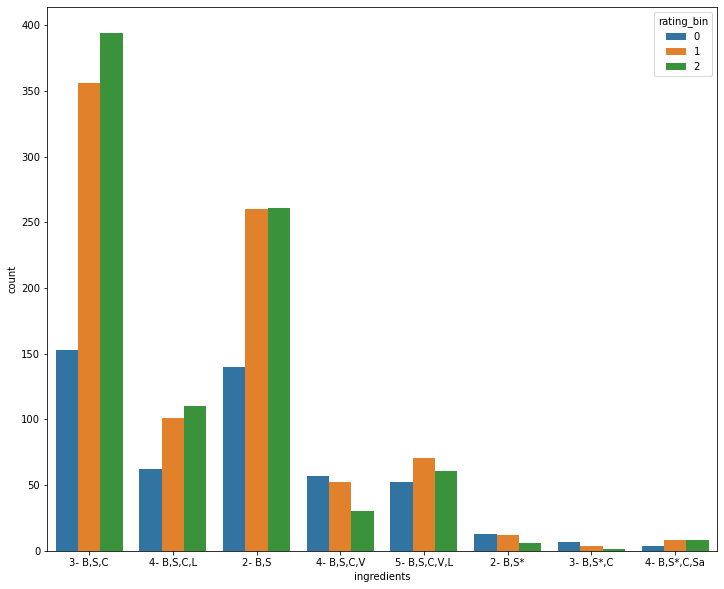

In [34]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(data=ingredients_df, x='ingredients', ax=ax, hue='rating_bin')

In [35]:
df['company_(manufacturer)'].value_counts().head(62)

Soma                       52
Arete                      32
Fresco                     31
Bonnat                     29
A. Morin                   25
                           ..
Danta                       9
Franceschi                  9
Cacao Sampaka               9
Potomac                     9
L.A. Burdick (Felchlin)     9
Name: company_(manufacturer), Length: 62, dtype: int64

Make a variable to find value counts but only filter 10.

In [36]:
manufacturer_to_keep = list(df['company_(manufacturer)'].value_counts()[:10].index)

Create a new dataframe that has the variable with the limited value counts.

In [37]:
manufacturer_df = df[df['company_(manufacturer)'].isin(manufacturer_to_keep)]

<AxesSubplot:xlabel='company_(manufacturer)', ylabel='count'>

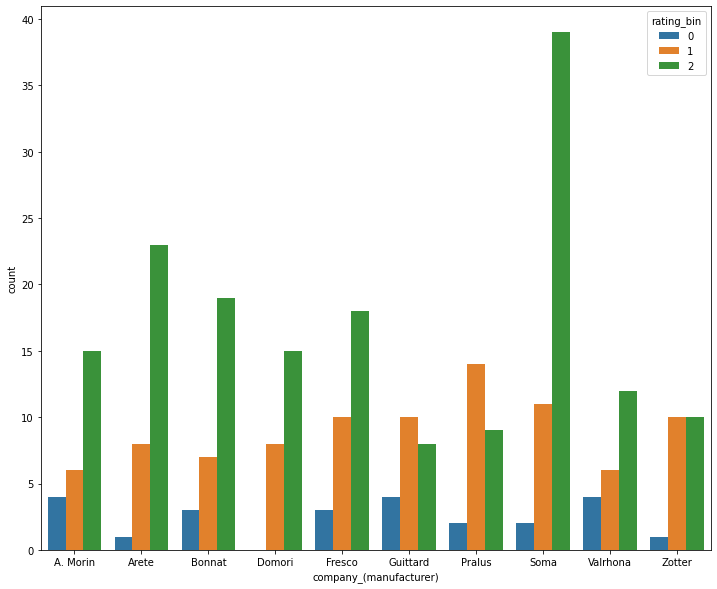

In [38]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(data=manufacturer_df, x='company_(manufacturer)', ax=ax, hue='rating_bin')

In [39]:
df['country_of_bean_origin'].value_counts()[:7]

Venezuela             246
Peru                  223
Ecuador               216
Dominican Republic    211
Madagascar            168
Blend                 152
Nicaragua              94
Name: country_of_bean_origin, dtype: int64

Make a variable to find value counts but only filter 7.

In [40]:
bean_origin_to_keep = list(df['country_of_bean_origin'].value_counts()[:7].index)

Create a new dataframe that has the variable with the filtered value counts.

In [41]:
bean_origin_df = df[df['country_of_bean_origin'].isin(bean_origin_to_keep)]

<AxesSubplot:xlabel='country_of_bean_origin', ylabel='count'>

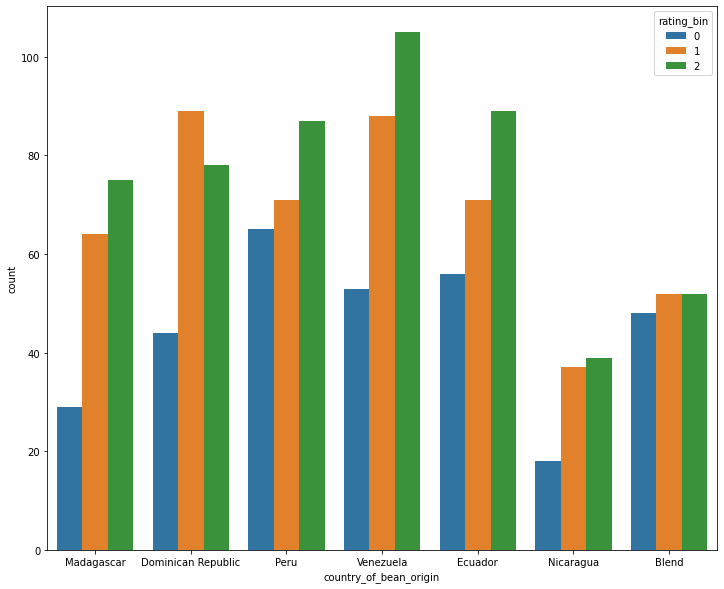

In [42]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(data=bean_origin_df, x='country_of_bean_origin', ax=ax, hue='rating_bin')

In [43]:
df['country_of_bean_origin'].value_counts()[:7]

Venezuela             246
Peru                  223
Ecuador               216
Dominican Republic    211
Madagascar            168
Blend                 152
Nicaragua              94
Name: country_of_bean_origin, dtype: int64

In [44]:
df['company_location'].value_counts()[:7]

U.S.A.     1014
France      174
Canada      162
U.K.        127
Italy        73
Belgium      59
Ecuador      58
Name: company_location, dtype: int64

Make a variable to find value counts but only filter 7.

In [45]:
comp_loc_to_keep = list(df['company_location'].value_counts()[:7].index)

Create a new dataframe that has the variable with the filtered value counts.

In [46]:
company_loc_df = df[df['company_location'].isin(comp_loc_to_keep)]

<AxesSubplot:xlabel='company_location', ylabel='count'>

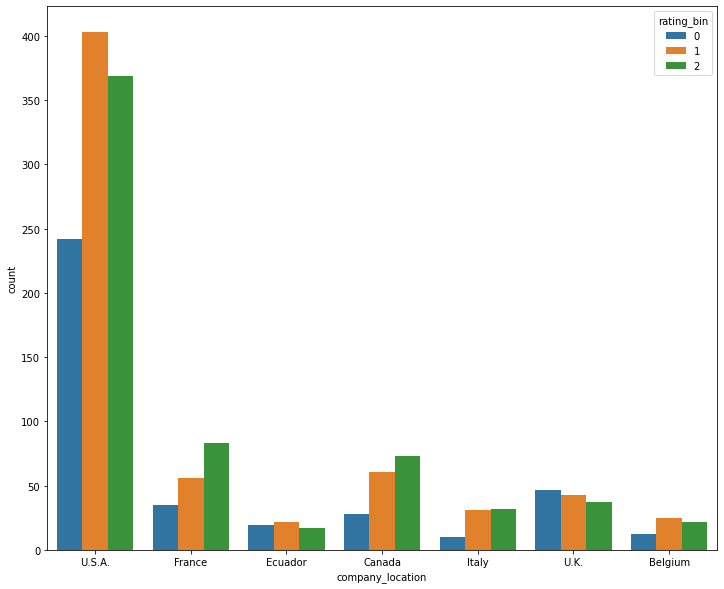

In [47]:
fig,ax = plt.subplots(figsize=(12,10))
sns.countplot(data=company_loc_df, x='company_location', ax=ax, hue='rating_bin')

In [48]:
df['company_location'].value_counts()

U.S.A.                   1014
France                    174
Canada                    162
U.K.                      127
Italy                      73
                         ... 
St.Vincent-Grenadines       1
Wales                       1
Suriname                    1
Ghana                       1
Martinique                  1
Name: company_location, Length: 67, dtype: int64

#